# Parallel `ContactFrequency` with Dask

In principle, each frame that makes up a `ContactFrequency` can have its contact map calculated in parallel. This shows how to use [`dask.distributed`](https://distributed.readthedocs.io/) to do this.

This will use the same example data as the main contact maps example (data from https://figshare.com/s/453b1b215cf2f9270769). See that example, `contact_map.ipynb`, for details.

In [1]:
%matplotlib inline
import mdtraj as md
# dask and distributed are extra installs
from dask.distributed import Client, LocalCluster
from contact_map.dask_runner import dask_run

In [2]:
trajectory = md.load("5550217/kras.xtc", top="5550217/kras.pdb")

In [3]:
# TODO: we need a more user-friendly approach for this than what we see here
run_info = {
    'trajectory_file': "5550217/kras.xtc",
    'load_kwargs': {'top': "5550217/kras.pdb"},
    'parameters': {}
}

Next we need to connect a client to a dask network.

Note that there are several ways to set up the dask computer network and then connect a client to it. See https://distributed.readthedocs.io/en/latest/setup.html. The approach used here creates a `LocalCluster`. Large scale simulations would need other approaches. Personally, I would usually recommend using `dask-mpi`. 

In [4]:
c = LocalCluster()
client = Client(c)

In [5]:
client

Client Scheduler: tcp://127.0.0.1:58299 Dashboard: http://127.0.0.1:8787,Cluster Workers: 4 Cores: 4 Memory: 8.59 GB


In [6]:
%%time
freq = dask_run(trajectory=trajectory, client=client, run_info=run_info)

CPU times: user 175 ms, sys: 117 ms, total: 292 ms
Wall time: 2.65 s


Note that on a single machine (shared memory) this may not improve performance. That is because the single-frame aspect of this calculation is already parallelized with OpenMP, and will therefore use all cores on the machine.

Next we check that we're still getting the same results:

In [7]:
# did it add up to give us the right number of frames?
freq.n_frames

101

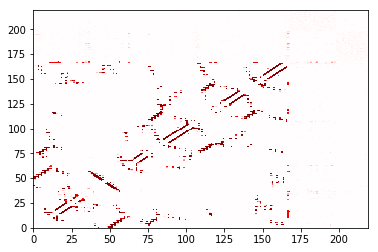

In [8]:
# do we get a familiar-looking residue map?
fig, ax = freq.residue_contacts.plot()